<a href="https://colab.research.google.com/github/John260260/Classification_problms_ML/blob/main/Wine_qlty.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [210]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
%matplotlib inline

In [211]:
df=pd.read_csv('/content/drive/MyDrive/Wine Quality Dataset/winequalityN.csv')

In [212]:
df.head(7)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.04,45.0,170.0,1.00,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.05,14.0,132.0,0.99,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.05,30.0,97.0,1.00,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.06,47.0,186.0,1.00,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.06,47.0,186.0,1.00,3.19,0.40,9.9,6
5,white,8.1,0.28,0.40,6.9,0.05,30.0,97.0,1.00,3.26,0.44,10.1,6
6,white,6.2,0.32,0.16,7.0,0.04,30.0,136.0,0.99,3.18,0.47,9.6,6


In [213]:
Counter(df['type'])

Counter({'red': 1599, 'white': 4898})

In [214]:
4898+1599

6497

In [215]:
4898/6497

0.7538864091118977

In [216]:
Counter(df['quality'])

Counter({3: 30, 4: 216, 5: 2138, 6: 2836, 7: 1079, 8: 193, 9: 5})

In [217]:
#Counter(df['fixed acidity'])

In [218]:
df.shape

(6497, 13)

In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [220]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.00,6489.00,6494.00,6495.00,6.50e+03,6497.00,6497.00,6.50e+03,6488.00,6493.00,6497.00,6497.00
mean,7.22,0.34,0.32,5.44,5.60e-02,30.53,115.74,9.95e-01,3.22,0.53,10.49,5.82
std,1.30,0.16,0.15,4.76,3.50e-02,17.75,56.52,3.00e-03,0.16,0.15,1.19,0.87
min,3.80,0.08,0.00,0.60,9.00e-03,1.00,6.00,9.87e-01,2.72,0.22,8.00,3.00
25%,6.40,0.23,0.25,1.80,3.80e-02,17.00,77.00,9.92e-01,3.11,0.43,9.50,5.00
50%,7.00,0.29,0.31,3.00,4.70e-02,29.00,118.00,9.95e-01,3.21,0.51,10.30,6.00
75%,7.70,0.40,0.39,8.10,6.50e-02,41.00,156.00,9.97e-01,3.32,0.60,11.30,6.00
max,15.90,1.58,1.66,65.80,6.11e-01,289.00,440.00,1.04e+00,4.01,2.00,14.90,9.00


In [221]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [222]:
pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 2) ##limiting decimals

In [223]:
#printing rows with nan

rows_with_NaN= df[df.isnull().any(axis=1)]

#is_NaN = df.isnull()
#row_has_NaN = is_NaN.any(axis=1)
#rows_with_NaN = df[row_has_NaN]

#print(rows_with_NaN)

In [224]:
rows_with_NaN.shape

(34, 13)

In [225]:
##del rows with null values... from Quality values(3-9) which have low frequency has no null values...so removed null values.
df_new=df.dropna(how='any',axis=0)

In [226]:
df_new

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.04,45.0,170.0,1.00,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.05,14.0,132.0,0.99,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.05,30.0,97.0,1.00,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.06,47.0,186.0,1.00,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.06,47.0,186.0,1.00,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,red,6.8,0.62,0.08,1.9,0.07,28.0,38.0,1.00,3.42,0.82,9.5,6
6492,red,6.2,0.60,0.08,2.0,0.09,32.0,44.0,0.99,3.45,0.58,10.5,5
6494,red,6.3,0.51,0.13,2.3,0.08,29.0,40.0,1.00,3.42,0.75,11.0,6
6495,red,5.9,0.65,0.12,2.0,0.07,32.0,44.0,1.00,3.57,0.71,10.2,5


In [227]:
Counter(df_new['type'])

Counter({'red': 1593, 'white': 4870})

In [228]:
Counter(df_new['quality'])

Counter({3: 30, 4: 214, 5: 2128, 6: 2820, 7: 1074, 8: 192, 9: 5})

In [229]:
Counter(df['quality'])

Counter({3: 30, 4: 216, 5: 2138, 6: 2836, 7: 1079, 8: 193, 9: 5})

In [230]:
df['fixed acidity'].mode()

0    6.8
dtype: float64

In [231]:
import warnings
warnings.simplefilter(action= 'ignore', category=Warning)

In [232]:
df['fixed acidity'].fillna(df['fixed acidity'].mean(),inplace=True)
df['volatile acidity'].fillna(df['volatile acidity'].mean(),inplace=True)
df['citric acid'].fillna(df['citric acid'].mean(),inplace=True)

In [233]:
#Counter(df['residual sugar'])

In [234]:
df['residual sugar'].fillna(df['residual sugar'].mean(),inplace=True)
#df['residual sugar'].isnull().any()

In [235]:
#Counter(df['chlorides'])

In [236]:
df['chlorides'].fillna(df['chlorides'].median(),inplace=True)
#df['chlorides'].isnull().any()

In [237]:
df['pH'].fillna(df['pH'].mean(),inplace=True)

In [238]:
#Counter(df['sulphates'])

In [239]:
df['sulphates'].fillna(df['sulphates'].mean(),inplace=True)

In [240]:
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [241]:
df_cat=df.copy()

In [242]:
df_cat['type'].replace({"white":0,"red":1}, inplace=True)

In [243]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   int64  
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


In [244]:
Counter(df_cat['type'])

Counter({0: 4898, 1: 1599})

In [245]:
Counter(df['type'])

Counter({'red': 1599, 'white': 4898})

##EDA

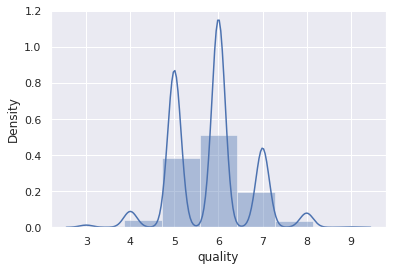

In [246]:
sns.set()
sns.distplot(df['quality'],bins=7)
plt.show()

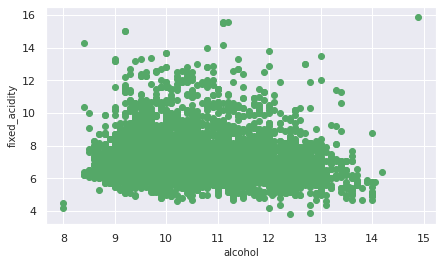

In [247]:
plt.figure(figsize=(7,4))
plt.scatter(x='alcohol',y='fixed acidity', data=df, marker='o',c='g')
plt.xlabel('alcohol',fontsize=10)
plt.ylabel('fixed_acidity',fontsize=10)
plt.show()

[]

<Figure size 504x288 with 0 Axes>

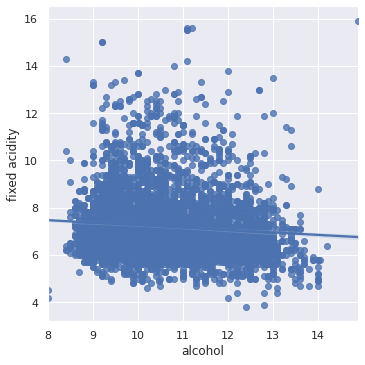

In [248]:
plt.figure(figsize=(7,4))
sns.lmplot(x='alcohol',y='fixed acidity', data=df)
plt.plot()

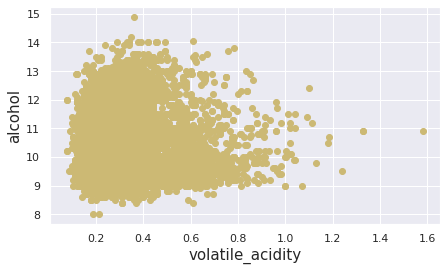

In [249]:
plt.figure(figsize=(7,4))
plt.scatter(x='volatile acidity',y='alcohol',data=df, marker='o',
            c='y')
plt.xlabel('volatile_acidity',fontsize=15)
plt.ylabel('alcohol',fontsize=15)
plt.show()

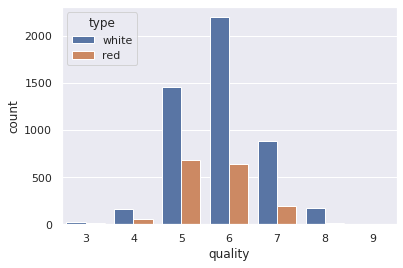

In [250]:
sns.set(style='darkgrid')
sns.countplot(df['quality'],hue='type', data=df)
plt.show()

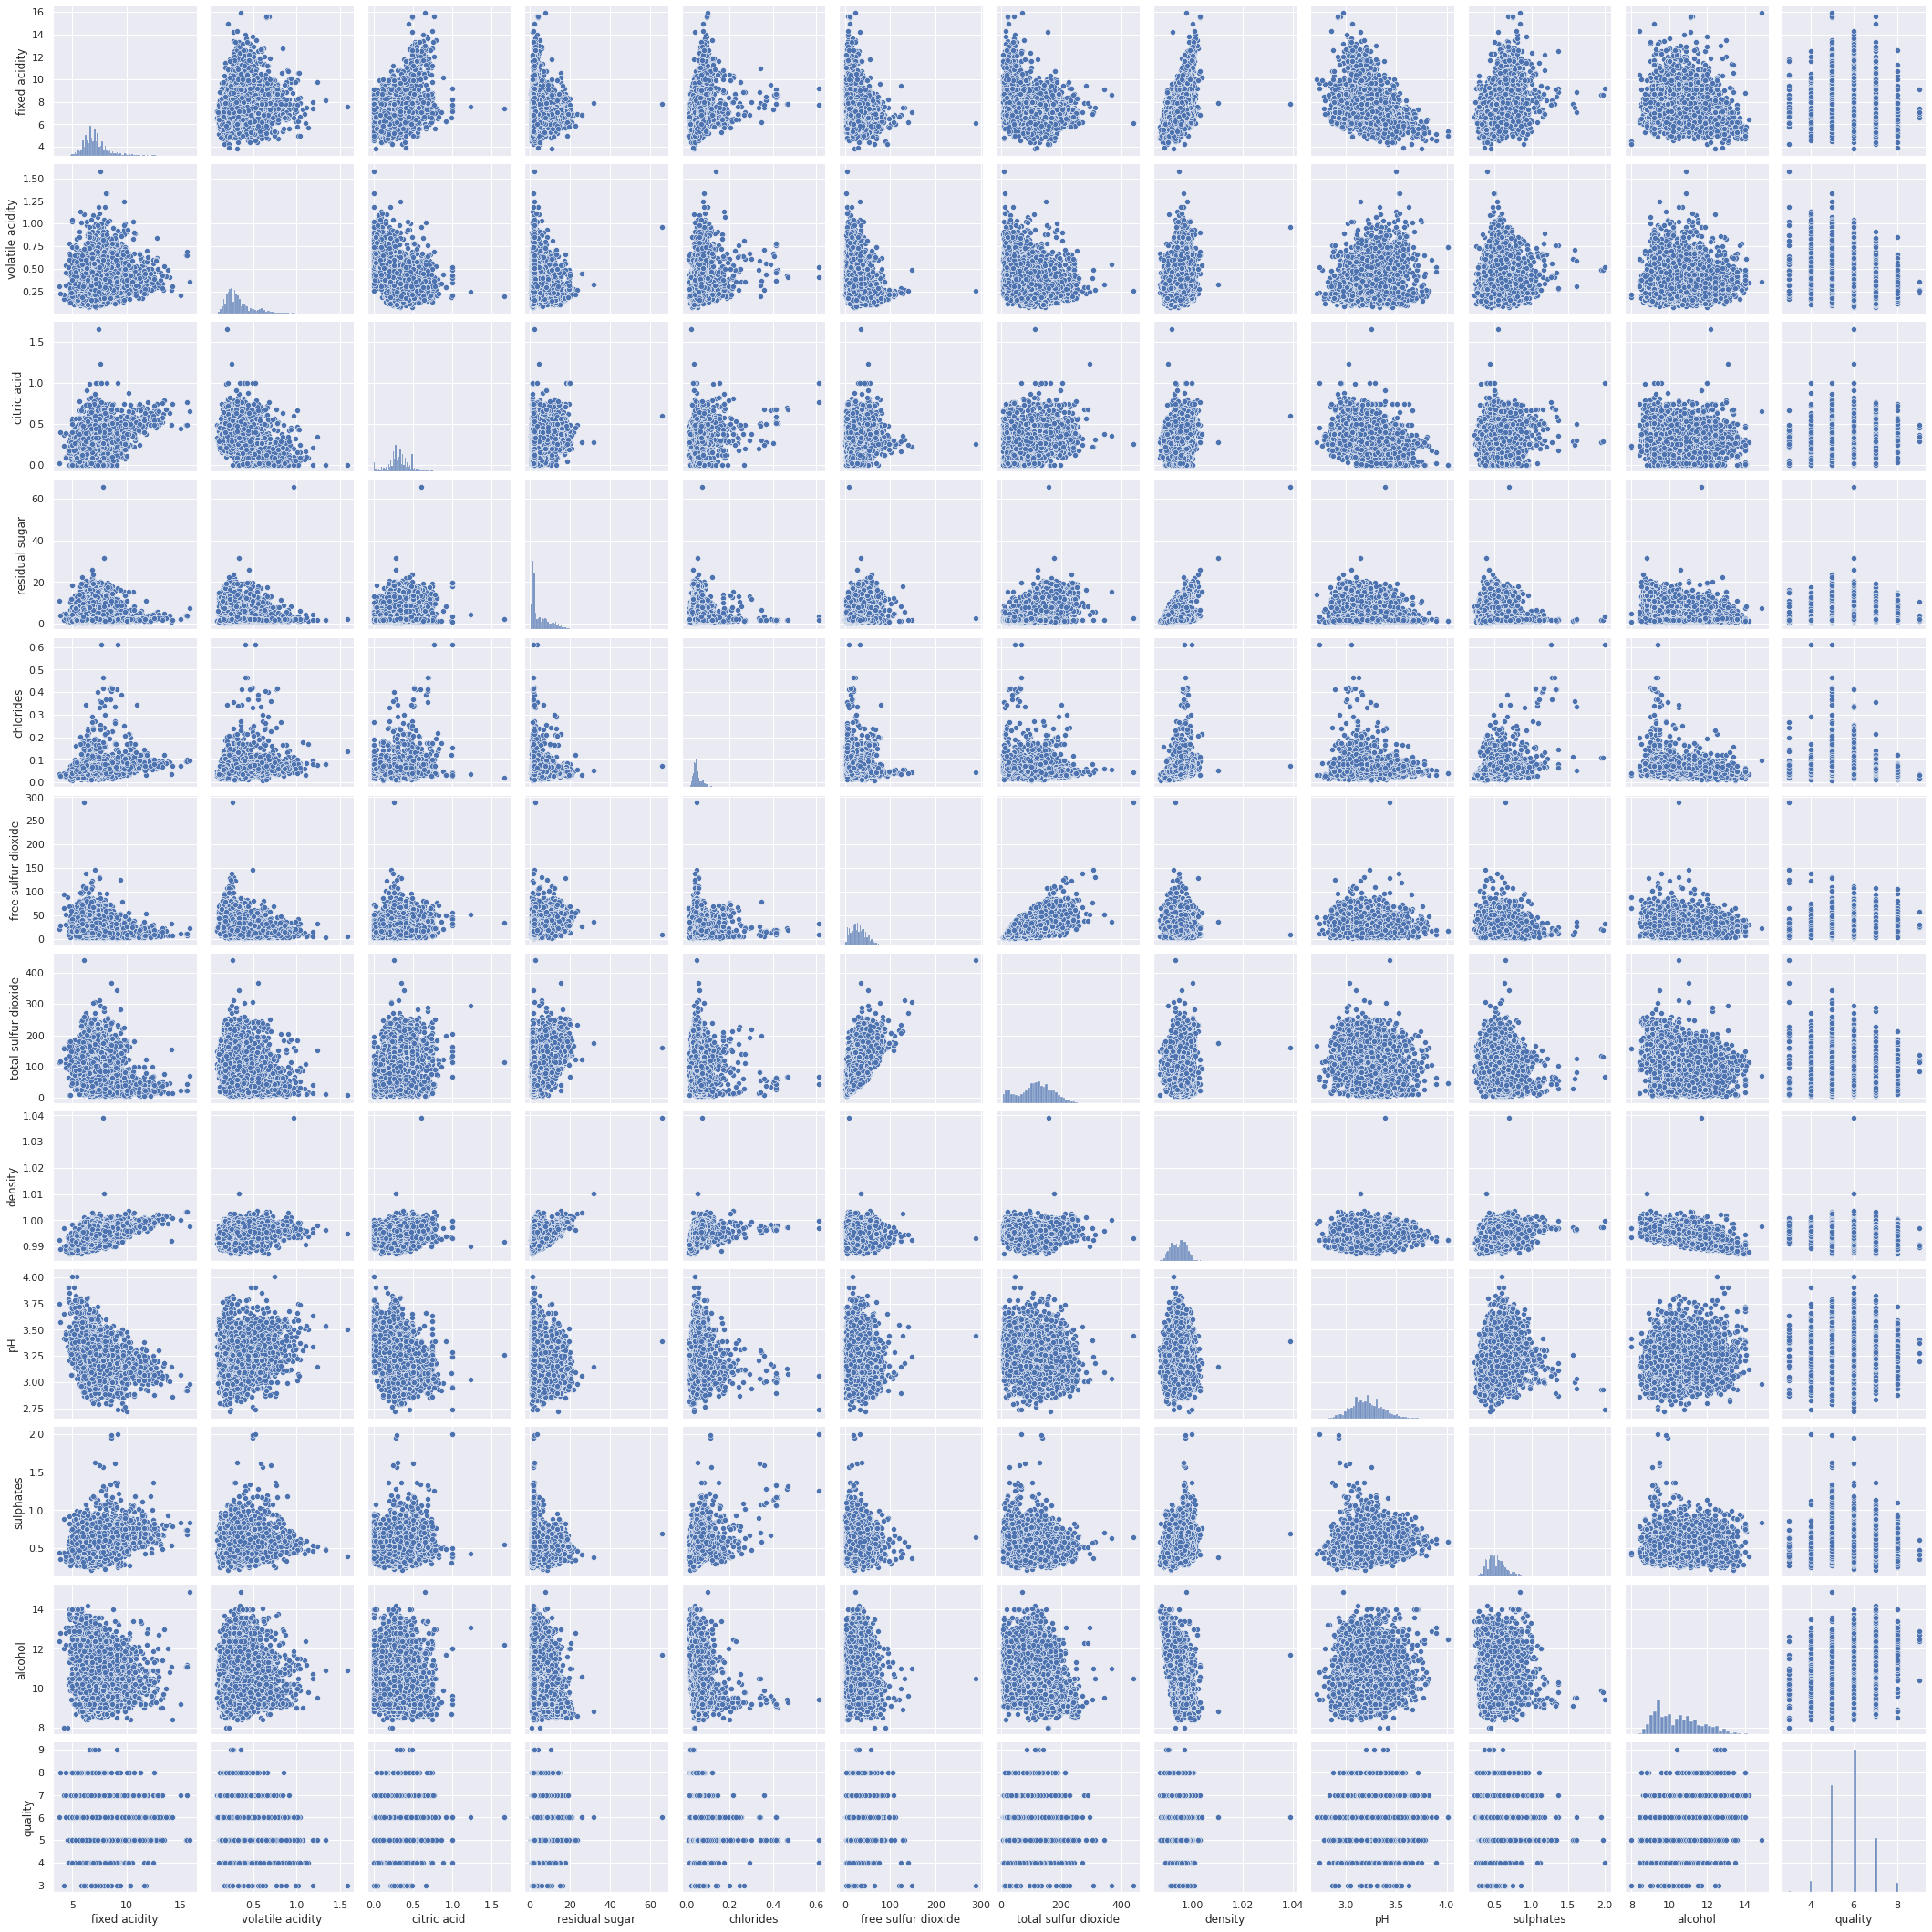

In [251]:
sns.set()
sns.pairplot(df)
plt.show()

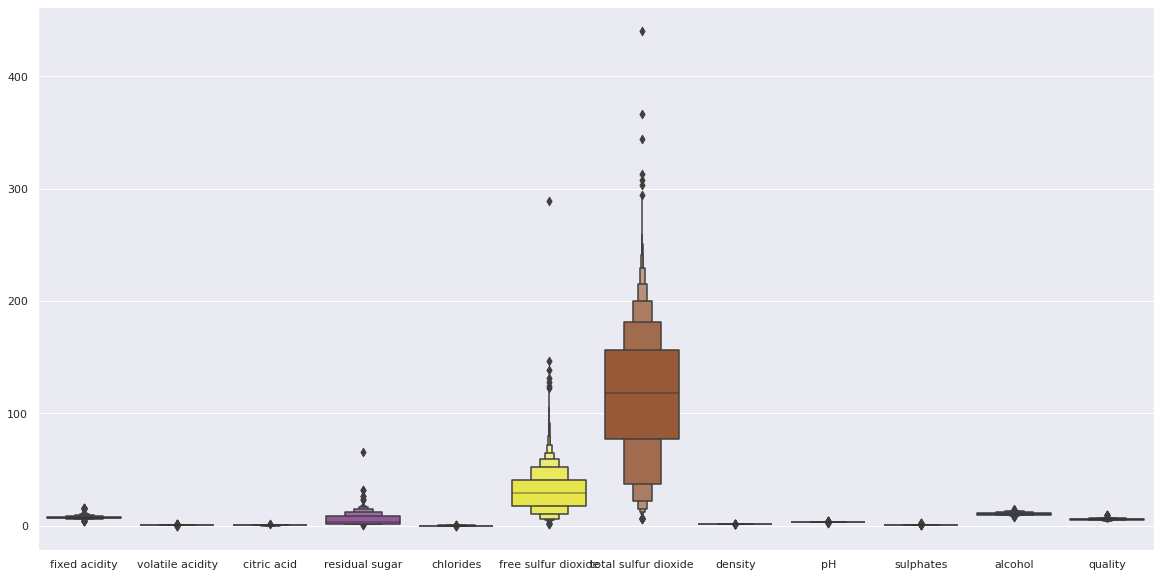

In [252]:
sns.set()
plt.figure(figsize=(20,10))
sns.boxenplot(data=df,palette='Set1')
plt.show()

In [253]:
lower_limit=df['free sulfur dioxide'].mean()-3*df['free sulfur dioxide'].std()
upper_limit=df['free sulfur dioxide'].mean()+3*df['free sulfur dioxide'].std()

In [254]:
print(lower_limit, upper_limit)

-22.722879937833156 83.77351869418224


In [255]:
df2=df[(df['free sulfur dioxide']>lower_limit)&(df['free sulfur dioxide']< upper_limit)]

In [256]:
df.shape[0]-df2.shape[0]

36

In [257]:
df2.shape

(6461, 13)

In [258]:
df.shape

(6497, 13)

In [259]:
lower_limit=df2['total sulfur dioxide'].mean()-3*df2['total sulfur dioxide'].std()
upper_limit=df2['total sulfur dioxide'].mean()+3*df2['total sulfur dioxide'].std()
print(lower_limit, upper_limit)

-53.15243132839596 283.65436601342924


In [260]:
df3=df2[(df2['total sulfur dioxide']>lower_limit)&(df2['total sulfur dioxide']< upper_limit)]

In [261]:
df2.shape[0]-df3.shape[0]

5

In [262]:
lower_limit=df3['residual sugar'].mean()-3*df3['residual sugar'].std()
upper_limit=df3['residual sugar'].mean()+3*df3['residual sugar'].std()
print(lower_limit, upper_limit)

-8.835863630876144 19.712440041288158


In [263]:
df4=df3[(df3['residual sugar']>lower_limit)&(df3['residual sugar']< upper_limit)]

In [264]:
df3.shape[0]-df4.shape[0]

26

In [266]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.00,6497.00,6497.00,6497.00,6.50e+03,6497.00,6497.00,6.50e+03,6497.00,6497.00,6497.00,6497.00
mean,7.22,0.34,0.32,5.44,5.60e-02,30.53,115.74,9.95e-01,3.22,0.53,10.49,5.82
std,1.30,0.16,0.15,4.76,3.50e-02,17.75,56.52,3.00e-03,0.16,0.15,1.19,0.87
min,3.80,0.08,0.00,0.60,9.00e-03,1.00,6.00,9.87e-01,2.72,0.22,8.00,3.00
25%,6.40,0.23,0.25,1.80,3.80e-02,17.00,77.00,9.92e-01,3.11,0.43,9.50,5.00
50%,7.00,0.29,0.31,3.00,4.70e-02,29.00,118.00,9.95e-01,3.21,0.51,10.30,6.00
75%,7.70,0.40,0.39,8.10,6.50e-02,41.00,156.00,9.97e-01,3.32,0.60,11.30,6.00
max,15.90,1.58,1.66,65.80,6.11e-01,289.00,440.00,1.04e+00,4.01,2.00,14.90,9.00


In [265]:
df4.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6430.00,6430.00,6430.00,6430.00,6.43e+03,6430.00,6430.00,6.43e+03,6430.00,6430.00,6430.00,6430.00
mean,7.22,0.34,0.32,5.36,5.61e-02,30.04,114.91,9.95e-01,3.22,0.53,10.50,5.82
std,1.30,0.16,0.14,4.59,3.52e-02,16.62,55.84,2.92e-03,0.16,0.15,1.19,0.87
min,3.80,0.08,0.00,0.60,9.00e-03,1.00,6.00,9.87e-01,2.72,0.22,8.00,3.00
25%,6.40,0.23,0.25,1.80,3.80e-02,17.00,77.00,9.92e-01,3.11,0.43,9.50,5.00
50%,7.00,0.29,0.31,3.00,4.70e-02,29.00,118.00,9.95e-01,3.21,0.51,10.30,6.00
75%,7.70,0.41,0.39,8.00,6.50e-02,41.00,155.00,9.97e-01,3.32,0.60,11.30,6.00
max,15.90,1.58,1.66,19.60,6.11e-01,83.00,282.00,1.00e+00,4.01,2.00,14.90,9.00


In [267]:
df.shape[0]-df4.shape[0]

67

In [268]:
dummies=pd.get_dummies(df4['type'],prefix= 'wine',drop_first=True)

In [270]:
df4=pd.concat([df4,dummies],axis=1)

In [271]:
df4.drop('type',axis=1,inplace=True)

In [275]:
df4.quality.value_counts()

6    2806
5    2116
7    1075
4     214
8     189
3      25
9       5
Name: quality, dtype: int64

In [276]:
quality_mapping={3: 'Low',4:'Low',5:'Medium',6:'Medium',7:'Medium',8:'High',9:'High'}
df4['quality']=df4['quality'].map(quality_mapping)

In [280]:
Counter(df4['quality'])

Counter({0: 239, 1: 5997, 2: 194})

In [279]:
mapping_quality={'Low':0,'Medium':1,'High':2}
df4['quality']=df4['quality'].map(mapping_quality)

In [281]:
x=df4.drop('quality',axis=True)
y=df4['quality']

###feature importance

In [283]:
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
model.fit(x,y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [284]:
print(model.feature_importances_)

[0.08458722 0.10906847 0.0865636  0.08972896 0.08138557 0.10114243
 0.08576621 0.08557346 0.08410014 0.08911205 0.09445678 0.00851512]


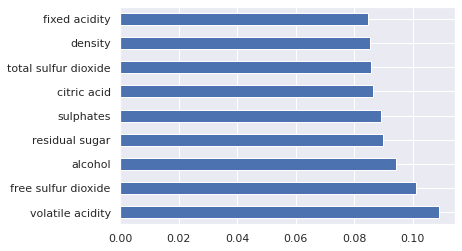

In [286]:
feat_importances=pd.Series(model.feature_importances_,index=x.columns)
feat_importances.nlargest(9).plot(kind='barh')
plt.show()

In [287]:
feat_importances

fixed acidity           8.46e-02
volatile acidity        1.09e-01
citric acid             8.66e-02
residual sugar          8.97e-02
chlorides               8.14e-02
free sulfur dioxide     1.01e-01
total sulfur dioxide    8.58e-02
density                 8.56e-02
pH                      8.41e-02
sulphates               8.91e-02
alcohol                 9.45e-02
wine_white              8.52e-03
dtype: float64

## Model Selection

In [292]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [294]:
model_params={
    'svm':{
        'model':SVC(gamma='auto'),
        'params':{
            'C': [1,10,20],
            'kernel':['rbf']
        }
    },

    'decision_tree':{
        'model':DecisionTreeClassifier(),
        'params':{
            'criterion':['entropy','gini'],
            'max_depth':[5,8,9]
        }
    },

    'random_forest':{
        'model':RandomForestClassifier(),
        'params':{
            'n_estimators':[1,5,10],
            'max_depth':[5,8,9]
        }
    },

    'naive_bayes':{
        'model': GaussianNB(),
        'params':{}
    },

    'logistic_Regression':{
        'model': LogisticRegression(solver='liblinear', multi_class='auto'),
        'params':{
            'C':[1,5,10]
        }
    }
}

In [295]:
score=[]
for model_name,mp in model_params.items():
  clf=GridSearchCV(mp['model'],mp['params'],cv=8,return_train_score=False)
  clf.fit(x,y)
  score.append({
      'Model': model_name,
      'Best_Score': clf.best_score_,
      'Best_Params':clf.best_params_
  })

In [296]:
df5=pd.DataFrame(score,columns=['Model','Best_Score','Best_Params'])

In [297]:
df5

,Model,Best_Score,Best_Params
0,svm,0.93,"{'C': 1, 'kernel': 'rbf'}"
1,decision_tree,0.92,"{'criterion': 'gini', 'max_depth': 5}"
2,random_forest,0.93,"{'max_depth': 5, 'n_estimators': 10}"
3,naive_bayes,0.73,{}
4,logistic_Regression,0.93,{'C': 10}


In [298]:
from sklearn.model_selection import cross_val_score
clf_svm=SVC(kernel='rbf', C=1)
scores=cross_val_score(clf_svm,x,y,cv=8, scoring='accuracy')

In [299]:
scores

array([0.93283582, 0.93283582, 0.93283582, 0.93283582, 0.93283582,
       0.93159204, 0.93275218, 0.93275218])

In [300]:
scores.mean()

0.9326594378667064

In [301]:
from sklearn.model_selection import train_test_split

In [302]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=0)

In [304]:
clf_svm1=SVC(kernel='rbf', C=1)
clf_svm1.fit(x_train,y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [305]:
y_pred=clf_svm1.predict(x_test)

In [306]:
from sklearn.metrics import accuracy_score
accuracy= accuracy_score(y_test,y_pred)

In [307]:
accuracy

0.9339035769828927

In [308]:
accuracy_dataframe=pd.DataFrame({'y_test':y_test, 'y_pred': y_pred})

In [309]:
accuracy_dataframe.head()

,y_test,y_pred
1935,1,1
1106,2,1
2932,1,1
743,1,1
2230,1,1
